In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

/Users/ritvikkhandelwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
df = pd.read_csv("file3.csv")
df = df.drop(columns=['Unnamed: 0','STAT_CAUSE_CODE','DISCOVERY_DATE_Greg','CONT_DATE_Greg'])
df

/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_32271/2350377722.py:1: DtypeWarning: Columns (11,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("file3.csv")


,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DISCOVERY_TIME,CONT_TIME,DISCOVERY_MONTH,DISCOVERY_DAY_OF_WEEK,DAYS_SPENT,HRS_SPENT,DISCOVERY YEAR,CONTAIN_MONTH,CONTAIN_DAY_OF_WEEK,CONTAIN YEAR
0,2005,Miscellaneous,40.036944,-121.005833,CA,0.10,1300.0,1730.0,2,Wednesday,0.0,4.500000,2005,2.0,Wednesday,2005.0
1,2004,Lightning,38.933056,-120.404444,CA,0.25,845.0,1530.0,5,Wednesday,0.0,6.750000,2004,5.0,Wednesday,2004.0
2,2004,Debris Burning,38.984167,-120.735556,CA,0.10,1921.0,2024.0,5,Monday,0.0,1.050000,2004,5.0,Monday,2004.0
3,2004,Lightning,38.559167,-119.913333,CA,0.10,1600.0,1400.0,6,Monday,5.0,118.000000,2004,7.0,Saturday,2004.0
4,2004,Lightning,38.559167,-119.933056,CA,0.10,1600.0,1200.0,6,Monday,5.0,116.000000,2004,7.0,Saturday,2004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,2015,Missing/Undefined,40.481637,-122.389375,CA,0.01,1726.0,1843.0,9,Saturday,0.0,1.283333,2015,9.0,Saturday,2015.0
1880461,2015,Miscellaneous,37.617619,-120.938570,CA,0.20,126.0,NaN,10,Monday,NaN,NaN,2015,NaN,NaN,NaN
1880462,2015,Missing/Undefined,37.617619,-120.938570,CA,0.10,2052.0,NaN,5,Saturday,NaN,NaN,2015,NaN,NaN,NaN
1880463,2015,Missing/Undefined,37.672235,-120.898356,CA,2.00,2309.0,NaN,10,Wednesday,NaN,NaN,2015,NaN,NaN,NaN


In [3]:
print(df.isnull().sum())

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df 

FIRE_YEAR                     0
STAT_CAUSE_DESCR              0
LATITUDE                      0
LONGITUDE                     0
STATE                         0
FIRE_SIZE                     0
DISCOVERY_TIME           882638
CONT_TIME                972553
DISCOVERY_MONTH               0
DISCOVERY_DAY_OF_WEEK         0
DAYS_SPENT               891531
HRS_SPENT                988458
DISCOVERY YEAR                0
CONTAIN_MONTH            891531
CONTAIN_DAY_OF_WEEK      891531
CONTAIN YEAR             891531
dtype: int64


,column_name,percent_missing
FIRE_YEAR,FIRE_YEAR,0.000000
STAT_CAUSE_DESCR,STAT_CAUSE_DESCR,0.000000
LATITUDE,LATITUDE,0.000000
LONGITUDE,LONGITUDE,0.000000
STATE,STATE,0.000000
FIRE_SIZE,FIRE_SIZE,0.000000
DISCOVERY_TIME,DISCOVERY_TIME,46.937220
CONT_TIME,CONT_TIME,51.718750
DISCOVERY_MONTH,DISCOVERY_MONTH,0.000000
DISCOVERY_DAY_OF_WEEK,DISCOVERY_DAY_OF_WEEK,0.000000


/Users/ritvikkhandelwal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CONTAIN_MONTH', ylabel='Density'>

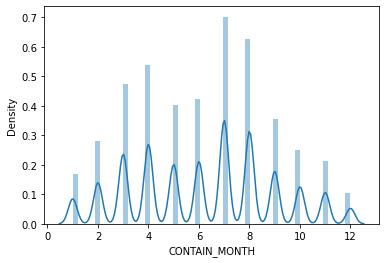

In [4]:
sns.distplot(df.CONTAIN_MONTH)

/Users/ritvikkhandelwal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CONTAIN YEAR', ylabel='Density'>

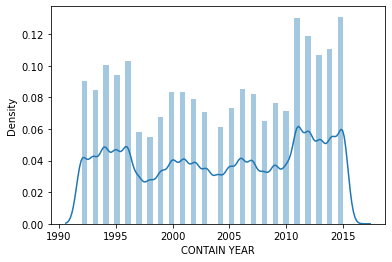

In [5]:
sns.distplot(df['CONTAIN YEAR'])

In [6]:
df = df.fillna(df.median())

/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_31410/3493596106.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [7]:
print(df.isnull().sum())

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df 

FIRE_YEAR                     0
STAT_CAUSE_DESCR              0
LATITUDE                      0
LONGITUDE                     0
STATE                         0
FIRE_SIZE                     0
DISCOVERY_TIME                0
CONT_TIME                     0
DISCOVERY_MONTH               0
DISCOVERY_DAY_OF_WEEK         0
DAYS_SPENT                    0
HRS_SPENT                     0
DISCOVERY YEAR                0
CONTAIN_MONTH                 0
CONTAIN_DAY_OF_WEEK      891531
CONTAIN YEAR                  0
dtype: int64


,column_name,percent_missing
FIRE_YEAR,FIRE_YEAR,0.000000
STAT_CAUSE_DESCR,STAT_CAUSE_DESCR,0.000000
LATITUDE,LATITUDE,0.000000
LONGITUDE,LONGITUDE,0.000000
STATE,STATE,0.000000
FIRE_SIZE,FIRE_SIZE,0.000000
DISCOVERY_TIME,DISCOVERY_TIME,0.000000
CONT_TIME,CONT_TIME,0.000000
DISCOVERY_MONTH,DISCOVERY_MONTH,0.000000
DISCOVERY_DAY_OF_WEEK,DISCOVERY_DAY_OF_WEEK,0.000000


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['STAT_CAUSE_DESCR'] = le.fit_transform(df['STAT_CAUSE_DESCR'])
df['STATE'] = le.fit_transform(df['STATE'])
df['DISCOVERY_DAY_OF_WEEK'] = le.fit_transform(df['DISCOVERY_DAY_OF_WEEK'])
df['CONTAIN_DAY_OF_WEEK'] = le.fit_transform(df['CONTAIN_DAY_OF_WEEK'])

In [ ]:
df.head()

In [ ]:
x = df.drop(columns = ['STAT_CAUSE_DESCR'])
y = df['STAT_CAUSE_DESCR']

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
X_dev, X_test, y_dev, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

decision = DecisionTreeClassifier(random_state = 0)

# Train Decision Tree Classifer
decision = decision.fit(X_dev, y_dev)

#Predict the response for test dataset
y_pred = decision.predict(X_test)
print("Accuracy on the test set is:",metrics.accuracy_score(df1_y_test, y_pred))

y_pred_dev = decision.predict(X_dev)
print("Accuracy on the development set is:",metrics.accuracy_score(df1_y_dev, y_pred_dev))

In [1]:
#F1 score 
from sklearn.metrics import f1_score
f1_test = f1_score(y_test, y_pred)
print("F1 score on test set is", f1_test)

f1_dev = f1_score(y_dev, y_pred_dev)
print("F1 score on development set is", f1_dev)

NameError: name 'y_test' is not defined

## V2 : DROPPING ALL MISSING VALUES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

/Users/ritvikkhandelwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [4]:
df = pd.read_csv("file3.csv")
df = df.drop(columns=['Unnamed: 0','STAT_CAUSE_CODE','DISCOVERY_DATE_Greg','CONT_DATE_Greg'])
df

/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_93293/2350377722.py:1: DtypeWarning: Columns (11,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("file3.csv")


,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DISCOVERY_TIME,CONT_TIME,DISCOVERY_MONTH,DISCOVERY_DAY_OF_WEEK,DAYS_SPENT,HRS_SPENT,DISCOVERY YEAR,CONTAIN_MONTH,CONTAIN_DAY_OF_WEEK,CONTAIN YEAR
0,2005,Miscellaneous,40.036944,-121.005833,CA,0.10,1300.0,1730.0,2,Wednesday,0.0,4.500000,2005,2.0,Wednesday,2005.0
1,2004,Lightning,38.933056,-120.404444,CA,0.25,845.0,1530.0,5,Wednesday,0.0,6.750000,2004,5.0,Wednesday,2004.0
2,2004,Debris Burning,38.984167,-120.735556,CA,0.10,1921.0,2024.0,5,Monday,0.0,1.050000,2004,5.0,Monday,2004.0
3,2004,Lightning,38.559167,-119.913333,CA,0.10,1600.0,1400.0,6,Monday,5.0,118.000000,2004,7.0,Saturday,2004.0
4,2004,Lightning,38.559167,-119.933056,CA,0.10,1600.0,1200.0,6,Monday,5.0,116.000000,2004,7.0,Saturday,2004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,2015,Missing/Undefined,40.481637,-122.389375,CA,0.01,1726.0,1843.0,9,Saturday,0.0,1.283333,2015,9.0,Saturday,2015.0
1880461,2015,Miscellaneous,37.617619,-120.938570,CA,0.20,126.0,NaN,10,Monday,NaN,NaN,2015,NaN,NaN,NaN
1880462,2015,Missing/Undefined,37.617619,-120.938570,CA,0.10,2052.0,NaN,5,Saturday,NaN,NaN,2015,NaN,NaN,NaN
1880463,2015,Missing/Undefined,37.672235,-120.898356,CA,2.00,2309.0,NaN,10,Wednesday,NaN,NaN,2015,NaN,NaN,NaN


In [3]:
df = df.dropna()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['STAT_CAUSE_DESCR'] = le.fit_transform(df['STAT_CAUSE_DESCR'])
df['STATE'] = le.fit_transform(df['STATE'])
df['DISCOVERY_DAY_OF_WEEK'] = le.fit_transform(df['DISCOVERY_DAY_OF_WEEK'])
df['CONTAIN_DAY_OF_WEEK'] = le.fit_transform(df['CONTAIN_DAY_OF_WEEK'])

In [ ]:
df.head()

In [6]:
x = df.drop(columns = ['STAT_CAUSE_DESCR'])
y = df['STAT_CAUSE_DESCR']

In [2]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
X_dev, X_test, y_dev, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

NameError: name 'train_test_split' is not defined

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

decision = DecisionTreeClassifier(random_state = 0, max_depth = 10)

# Train Decision Tree Classifer
decision = decision.fit(X_dev, y_dev)

#Predict the response for test dataset
y_pred = decision.predict(X_test)
print("Accuracy on the test set is:",metrics.accuracy_score(y_test, y_pred))

y_pred_dev = decision.predict(X_dev)
print("Accuracy on the development set is:",metrics.accuracy_score(y_dev, y_pred_dev))

NameError: name 'X_dev' is not defined

In [ ]:
#F1 score 
from sklearn.metrics import f1_score
f1_test = f1_score(y_test, y_pred)
print("F1 score on test set is", f1_test)

f1_dev = f1_score(y_dev, y_pred_dev)
print("F1 score on development set is", f1_dev)

In [10]:
clf_rf = RandomForestClassifier(n_estimators=50, random_state = 0)
clf_rf = clf_rf.fit(X_dev, y_dev)

y_pred = clf_rf.predict(X_test)
print("Accuracy on the test set is:",metrics.accuracy_score(y_test, y_pred))

y_pred_dev = clf_rf.predict(X_dev)
print("Accuracy on the development set is:",metrics.accuracy_score(y_dev, y_pred_dev))

Accuracy on the test set is: 0.6095559466822121
Accuracy on the development set is: 0.9997841943372033


## see macro average precision 
## see feature importance 